In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import pickle

### Import dataset

In [60]:
df = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/hybrid_planned_yield_dataset_all_seasons.csv').drop(columns = ['Unnamed: 0'])

print(display(df))

,Field_Name,CO2_kg_per_Ha,Crop_Protection_Application_Doses,Soil_Organic_Matter,Yield_kg_per_Ha,Total_N,Total_P,Total_K,Season,Hybrid,Planned_Yield_kg_per_ha
0,M6I2035,-220.35,14.0,2.500000,3049.333333,205.5000,48.0000,48.0000,WINTER,DKB335PRO3,4700.0
1,M6I2036,3847.21,18.0,2.500000,3575.055556,492.0000,216.0000,216.0000,WINTER,DKB335PRO3,4700.0
2,M6I2037,415.52,13.0,2.500000,3116.200000,198.0000,60.0000,60.0000,WINTER,DKB335PRO3,4700.0
3,M6I2009,724.51,9.0,2.500000,7678.888889,202.4000,95.2000,96.0000,WINTER,AG8480PRO3,6300.0
4,M6I2010,502.10,9.0,2.500000,7756.363636,179.4000,95.2000,90.0000,WINTER,AG8480PRO3,6300.0
5,M6I2011,539.27,10.0,2.500000,8235.200000,179.4000,95.2000,102.0000,WINTER,AG8480PRO3,6300.0
6,M6I20175,814.34,9.0,2.500000,8178.000000,207.8500,122.6000,138.0000,WINTER,AG8480PRO3,6300.0
7,M6I2022,549.46,10.0,2.500000,7470.315789,179.9500,97.8000,102.0000,WINTER,AG8480PRO3,6300.0
8,M6I20134,730.99,17.0,2.500000,8674.700000,177.5000,75.0000,140.0000,WINTER,DKB255PRO3,6100.0
9,M6V2017,-246.74,14.0,3.690000,7586.243386,170.2000,0.0000,0.0000,SUMMER,AS1777PRO3,6200.0


None


### Value Count Per Hybrid

DKB360PRO3     65
DKB230PRO3     64
AG8480PRO3     64
AG8700PRO3     53
DKB265PRO3     44
DKB255PRO3     41
DKB290PRO3     37
AG9025PRO3     31
AS1868PRO3     29
AS1844PRO3     29
AS1666PRO3     26
DKB335PRO3     25
AS1820PRO3     25
DKB363PRO3     23
3500RR2        21
AG8780PRO3     21
AG9030PRO3     21
AS1633PRO3     19
3700RR2        18
AS1822PRO3     17
AG8088PRO2     17
AS1777PRO3     15
AG8061PRO2     13
AG1051         13
DKB177PRO3     13
AG8070PRO3     13
AG7098PRO2     13
AS1757PRO3     12
AG8065PRO3     10
AG7088PRO3     10
AG9000PRO3      8
AS1677PRO3      8
DKB390PRO4      7
DKB290TRE       7
AS1850PRO3      6
DKB240PRO3      6
AS1633PRO3I     6
DKB235PRO3      6
AG8700PRO4      5
AG8690PRO3      5
3110RR2         4
3320RR2         4
AS1730PRO3      4
3800RR2         4
AG8480PRO4      4
AG9050PRO3      4
AS1800PRO3      4
AG8780PRO4      3
AG7098TRE       3
2200RR2         3
DKB390PRO2      3
AG9035PRO3      2
AG8780PRO       2
AG9021PRO3      2
AG7088RR2       1
AG9040    

Text(0.5, 1.0, 'Histogram of Number of Fields Containing Particular Hybrid')

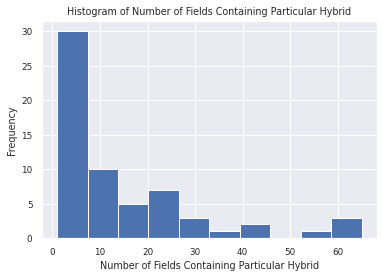

In [33]:
pd.set_option("display.max_rows", None)

print(df['Hybrid'].value_counts())

plt.figure()
df['Hybrid'].value_counts().hist()
plt.xlabel('Number of Fields Containing Particular Hybrid')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Fields Containing Particular Hybrid')

### Scatterplot and correlolgram for hybrid with most fields

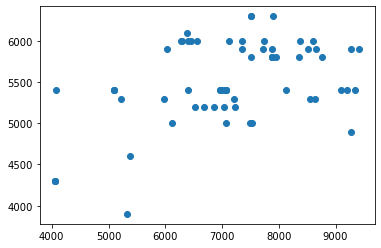

In [10]:
plt.scatter(df[df['Hybrid'] == 'DKB360PRO3']['Yield_kg_per_Ha'], df[df['Hybrid'] == 'DKB360PRO3']['Planned_Yield_kg_per_ha'])

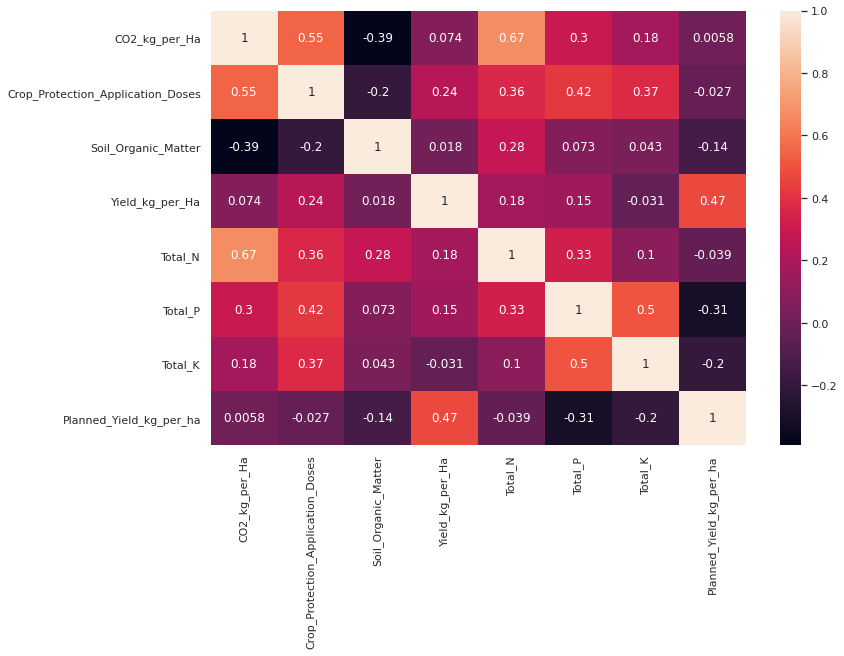

In [18]:
corr_matrix = df[df['Hybrid'] == 'DKB360PRO3'].corr()
plt.figure(figsize = (12, 8))
sn.heatmap(corr_matrix, annot = True)
sn.set(font_scale = .8)
plt.show()

In [26]:
X = df[df['Hybrid'] == 'DKB360PRO3'].reset_index(drop = True).drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Yield_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])

print(display(X))
y = df[df['Hybrid'] == 'DKB360PRO3'].reset_index(drop = True)['Yield_kg_per_Ha']
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Total_N,Total_P,Total_K
0,13.0,2.500000,74.25,0.0,0.0
1,15.0,2.470000,74.25,0.0,0.0
2,19.0,4.800000,208.30,104.0,132.0
3,15.0,2.500000,33.00,99.0,105.0
4,15.0,2.500000,206.00,78.0,90.0
...,...,...,...,...,...
60,15.0,2.597851,92.00,0.0,0.0
61,17.0,3.120000,184.00,0.0,0.0
62,19.0,2.930000,92.00,0.0,0.0
63,17.0,3.240000,207.00,0.0,0.0


None
0.09534242005520399
[ 83.66449596 121.90894656   0.99688337   2.34620236  -4.59335984]
5200.539483549002


In [27]:
X = df[df['Hybrid'] == 'DKB230PRO3'].reset_index(drop = True).drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Yield_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])

print(display(X))
y = df[df['Hybrid'] == 'DKB230PRO3'].reset_index(drop = True)['Yield_kg_per_Ha']
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Total_N,Total_P,Total_K
0,20.0,2.5,144.83,1.56,90.0
1,18.0,2.3,144.50,0.00,90.0
2,17.0,2.7,144.50,0.00,90.0
3,18.0,2.2,114.00,0.00,90.0
4,21.0,1.9,144.50,0.00,90.0
...,...,...,...,...,...
59,15.0,2.5,16.50,78.00,0.0
60,15.0,2.5,92.00,0.00,0.0
61,15.0,3.1,128.00,63.00,150.0
62,15.0,2.1,128.00,126.00,150.0


None
0.16801582542940408
[-50.69174047 298.39001535   2.82541596  -6.52376167   4.12704473]
5741.301572713808


In [28]:
X = df[df['Hybrid'] == 'AG8480PRO3'].reset_index(drop = True).drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Yield_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])

print(display(X))
y = df[df['Hybrid'] == 'AG8480PRO3'].reset_index(drop = True)['Yield_kg_per_Ha']
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

,Crop_Protection_Application_Doses,Soil_Organic_Matter,Total_N,Total_P,Total_K
0,9.0,2.500000,202.40,95.2,96.0
1,9.0,2.500000,179.40,95.2,90.0
2,10.0,2.500000,179.40,95.2,102.0
3,9.0,2.500000,207.85,122.6,138.0
4,10.0,2.500000,179.95,97.8,102.0
...,...,...,...,...,...
59,27.0,2.500000,119.50,130.0,90.0
60,18.0,4.160000,242.00,0.0,100.0
61,21.0,2.500000,265.00,0.0,100.0
62,22.0,2.910000,265.00,0.0,100.0


None
0.13085202993461653
[ -99.61640913 -134.89839392    1.11759806   -6.68583431   -0.45519476]
9784.973180200352


In [41]:
class PredictorWithScalars:
    
    def __init__(self, predictor, X_scaler, y_scaler):
        self.predictor = predictor
        self.X_scaler = X_scaler
        self.y_scaler = y_scaler
    
    def transform_X(self, X):
        transformed_X = self.X_scaler.transform(X)
        return transformed_X
    
    def transform_y(self, y):
        transformed_y = self.y_scaler.transform(y)
        return transformed_y

    def predict(self, X):
        transformed_X = self.X_scaler.transform(X)
        transformed_y_preds = self.predictor.predict(transformed_X).reshape(-1,1)
        inverse_transformed_y_preds = self.y_scaler.inverse_transform(transformed_y_preds)
        return inverse_transformed_y_preds

In [74]:
# hybrids with > 19: ML approach with test set

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'WINTER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    standard_scaler_X = StandardScaler().fit(X_train)
    standard_scaler_y = StandardScaler().fit(y_train)
    
    reg = LinearRegression()
    
    predictorScaler = PredictorWithScalars(reg, standard_scaler_X, standard_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/winter_models_hybrid_level.pkl', 'wb'))

  train_size test_size        r2         rmse          mae
0         39        17 -0.852457  1703.678676  1367.457385
1         26        12 -0.236639  1941.842974  1614.000324
2         26        12 -0.035238  1635.543143  1347.533558
3         24        11  0.013570  2086.705785  1341.053357
4         20         9  0.035496  2055.271490  1434.220516
5         17         8 -0.366323  1625.040659  1315.354707
6         17         8 -1.870432  3191.248593  2478.217417
7         16         8 -1.057500  1925.486047  1648.998095
8         16         7 -2.171089  2903.058386  1980.604746


In [72]:
print(len(df[df['Season'] == 'WINTER']['Hybrid'].value_counts()))
print(len(df[df['Season'] == 'SUMMER']['Hybrid'].value_counts()))

42
55


In [73]:
print(len(df['Hybrid'].value_counts()))

62


In [ ]:
# hybrids with > 19: ML approach with test set

df_copy = df.copy()

df_copy = df_copy[df_copy['Season'] == 'WINTER'].reset_index(drop = True)
counts = df_copy['Hybrid'].value_counts()
values_to_keep = counts[counts >= 20].index
subset_df = df_copy[df_copy['Hybrid'].isin(values_to_keep)].reset_index(drop = True)
hybrid_list = subset_df['Hybrid'].value_counts().index

results_df = pd.DataFrame(columns = ['train_size', 'test_size', 'r2', 'rmse', 'mae'])
model_dict = {}

for i,hybrid in enumerate(hybrid_list):
    
    temp_df = subset_df[subset_df['Hybrid'] == hybrid].reset_index(drop = True)
    
    temp_df = temp_df.drop(columns = ['Field_Name', 'CO2_kg_per_Ha', 'Season', 'Hybrid', 'Planned_Yield_kg_per_ha'])
    
    X = temp_df.drop(columns = ['Yield_kg_per_Ha'])
    y = np.array(temp_df['Yield_kg_per_Ha']).reshape(-1,1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    
    standard_scaler_X = StandardScaler().fit(X_train)
    standard_scaler_y = StandardScaler().fit(y_train)
    
    reg = LinearRegression()
    
    predictorScaler = PredictorWithScalars(reg, standard_scaler_X, standard_scaler_y)
    predictorScaler.predictor = predictorScaler.predictor.fit(predictorScaler.transform_X(X_train), predictorScaler.transform_y(y_train))
    
    y_preds = predictorScaler.predict(X_test)
    
    r_squared = r2_score(y_test, y_preds)
    rmse = mean_squared_error(y_test, y_preds, squared = False)
    mean_abs_error = mean_absolute_error(y_test, y_preds)
    
    row = pd.DataFrame({'train_size': X_train.shape[0], 'test_size': X_test.shape[0], 'r2': [r_squared], 'rmse': [rmse], 'mae': [mean_abs_error]})
    
    results_df = pd.concat([results_df, row])
    
    model_dict.update({hybrid: predictorScaler})
    
print(results_df.reset_index(drop = True))

pickle.dump(model_dict, open('/mnt/Prediction_on_hybrid_basis/Yield_Prediction/pickle_files/winter_models_hybrid_level.pkl', 'wb'))